In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("/media/usb/Artificial-Neural-Network-Datasets/Multi-Class-Classification/Wines-Dataset/wine.data")

In [3]:
dataset.shape

(178, 14)

In [4]:
dataset.columns

Index(['Classes', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [5]:
dataset.head()

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
y = dataset['Classes']

In [7]:
y.shape

(178,)

In [8]:
type(y)

pandas.core.series.Series

In [9]:
y.value_counts()

2    71
1    59
3    48
Name: Classes, dtype: int64

In [10]:
pd.get_dummies(y)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [11]:
y_categorical = pd.get_dummies(y)

In [12]:
y_categorical.shape

(178, 3)

In [13]:
y_categorical

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='Alcohol', ylabel='Classes'>

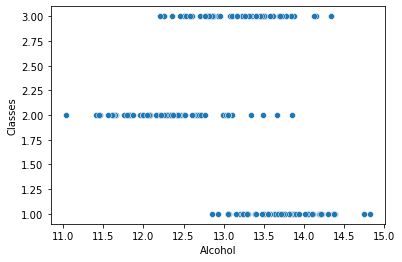

In [15]:
sns.scatterplot(x="Alcohol",y="Classes",data=dataset)

<AxesSubplot:xlabel='Malic acid', ylabel='Classes'>

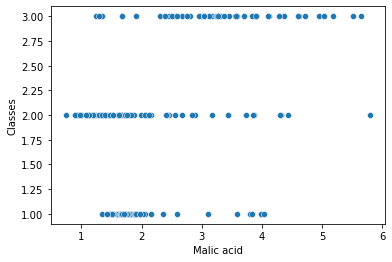

In [16]:
sns.scatterplot(x="Malic acid",y="Classes",data=dataset)

<AxesSubplot:xlabel='Ash', ylabel='Classes'>

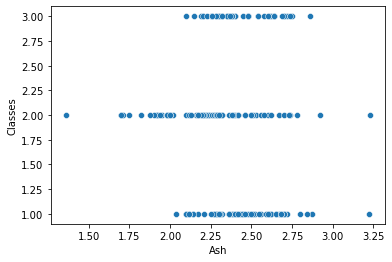

In [17]:
#See overlapping values so remove it: Ash ==> Not Important feature
sns.scatterplot(x="Ash",y="Classes",data=dataset)

<AxesSubplot:xlabel='Alcalinity of ash', ylabel='Classes'>

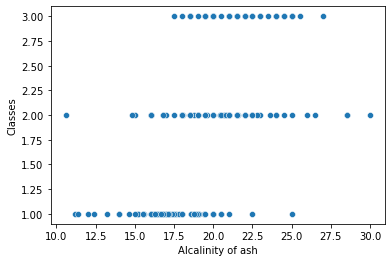

In [18]:
sns.scatterplot(x="Alcalinity of ash",y="Classes",data=dataset)

<AxesSubplot:xlabel='Magnesium', ylabel='Classes'>

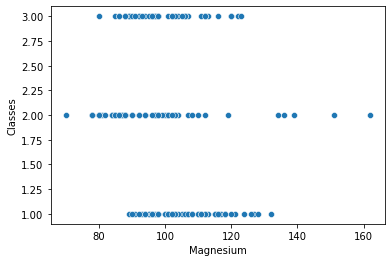

In [19]:
#Magenesium is not an Important feature: OVERLAPPING VALUES
sns.scatterplot(x="Magnesium",y="Classes",data=dataset)

<AxesSubplot:xlabel='Total phenols', ylabel='Classes'>

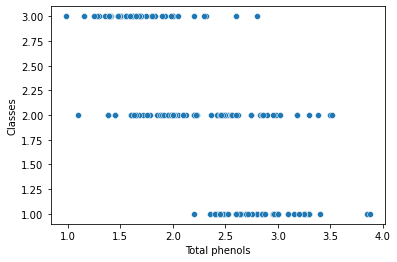

In [20]:
sns.scatterplot(x="Total phenols",y="Classes",data=dataset)

<AxesSubplot:xlabel='Flavanoids', ylabel='Classes'>

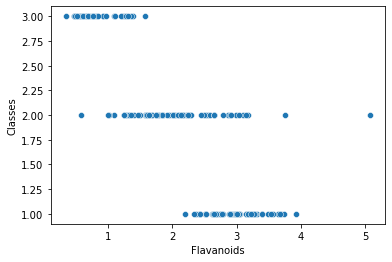

In [21]:
sns.scatterplot(x="Flavanoids",y="Classes",data=dataset)

<AxesSubplot:xlabel='Nonflavanoid phenols', ylabel='Classes'>

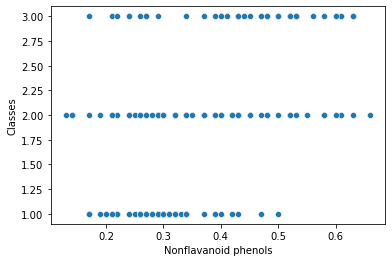

In [22]:
#Not a good feature as it has distributed values for all classes
sns.scatterplot(x="Nonflavanoid phenols",y="Classes",data=dataset)

<AxesSubplot:xlabel='Proanthocyanins', ylabel='Classes'>

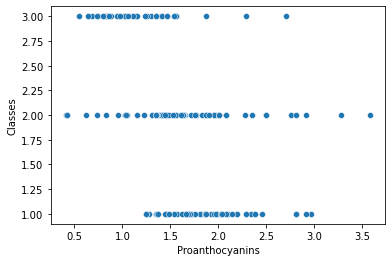

In [23]:
sns.scatterplot(x="Proanthocyanins",y="Classes",data=dataset)

<AxesSubplot:xlabel='Color intensity', ylabel='Classes'>

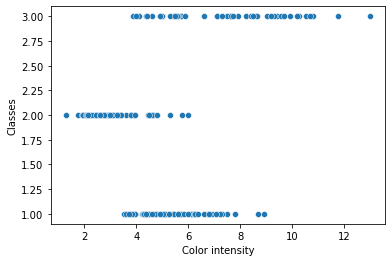

In [24]:
sns.scatterplot(x="Color intensity",y="Classes",data=dataset)

<AxesSubplot:xlabel='Hue', ylabel='Classes'>

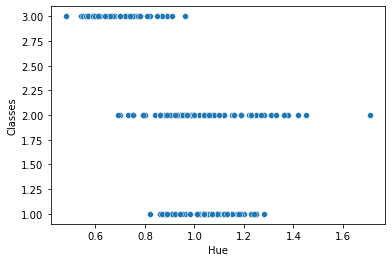

In [25]:
sns.scatterplot(x="Hue",y="Classes",data=dataset)

<AxesSubplot:xlabel='OD280/OD315 of diluted wines', ylabel='Classes'>

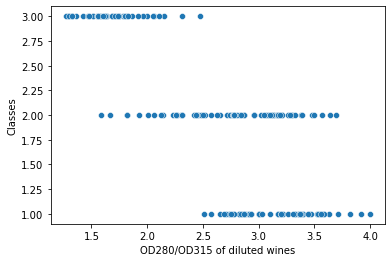

In [26]:
sns.scatterplot(x="OD280/OD315 of diluted wines",y="Classes",data=dataset)

<AxesSubplot:xlabel='Proline', ylabel='Classes'>

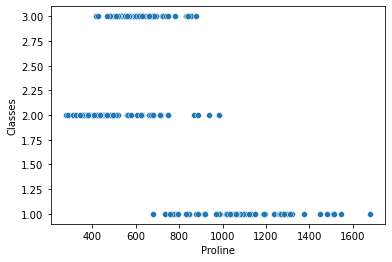

In [27]:
sns.scatterplot(x="Proline",y="Classes",data=dataset)

In [28]:
#Feature Elimination
x=dataset
for i in ["Ash","Magnesium","Nonflavanoid phenols","Classes"]:
    x=x.drop(i,axis=1)
x

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,15.6,2.80,3.06,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,2.65,2.76,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,2.80,3.24,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,3.85,3.49,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,2.80,2.69,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,1.68,0.61,1.06,7.70,0.64,1.74,740
174,13.40,3.91,23.0,1.80,0.75,1.41,7.30,0.70,1.56,750
175,13.27,4.28,20.0,1.59,0.69,1.35,10.20,0.59,1.56,835
176,13.17,2.59,20.0,1.65,0.68,1.46,9.30,0.60,1.62,840


In [29]:
x.shape

(178, 10)

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Alcalinity of ash             178 non-null    float64
 3   Total phenols                 178 non-null    float64
 4   Flavanoids                    178 non-null    float64
 5   Proanthocyanins               178 non-null    float64
 6   Color intensity               178 non-null    float64
 7   Hue                           178 non-null    float64
 8   OD280/OD315 of diluted wines  178 non-null    float64
 9   Proline                       178 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 14.0 KB


In [31]:
from keras.models import Sequential

In [32]:
model = Sequential()

In [33]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [34]:
from keras.layers import Dense

In [35]:
model.add(
    Dense(
        units = 16,
        input_shape=(10,),
        activation="relu",
        kernel_initializer="he_normal"
    )
)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(
    Dense(
        units=16,
        activation='relu',
        kernel_initializer='he_normal'
    )
)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.add(
    Dense(
        units=16,
        activation='relu',
        kernel_initializer='he_normal'
    )
)

In [40]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 16,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name

In [41]:
model.add(
    Dense(
        units=3,
        activation="softmax"
    )
)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.optimizers import RMSprop

In [44]:
model.compile(optimizer=RMSprop(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.fit(x,y_categorical,epochs=175)

Epoch 1/175
6/6 [==============================] - 1s 2ms/step - loss: 101.0759 - accuracy: 0.3471
Epoch 2/175
6/6 [==============================] - 0s 2ms/step - loss: 30.8923 - accuracy: 0.3766
Epoch 3/175
6/6 [==============================] - 0s 2ms/step - loss: 22.9360 - accuracy: 0.2935
Epoch 4/175
6/6 [==============================] - 0s 5ms/step - loss: 16.7891 - accuracy: 0.3315
Epoch 5/175
6/6 [==============================] - 0s 2ms/step - loss: 12.8046 - accuracy: 0.3446
Epoch 6/175
6/6 [==============================] - 0s 3ms/step - loss: 14.3661 - accuracy: 0.2867
Epoch 7/175
6/6 [==============================] - 0s 5ms/step - loss: 9.0758 - accuracy: 0.3184
Epoch 8/175
6/6 [==============================] - 0s 2ms/step - loss: 9.6952 - accuracy: 0.3126
Epoch 9/175
6/6 [==============================] - 0s 3ms/step - loss: 7.6666 - accuracy: 0.3397
Epoch 10/175
6/6 [==============================] - 0s 3ms/step - loss: 4.7603 - accuracy: 0.3067
Epoch 11/175
6/6 [====

6/6 [==============================] - 0s 4ms/step - loss: 1.5040 - accuracy: 0.6838
Epoch 85/175
6/6 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8858
Epoch 86/175
6/6 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8774
Epoch 87/175
6/6 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.8186
Epoch 88/175
6/6 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8594
Epoch 89/175
6/6 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.8854
Epoch 90/175
6/6 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9288
Epoch 91/175
6/6 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.8049
Epoch 92/175
6/6 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.8893
Epoch 93/175
6/6 [==============================] - 0s 4ms/step - loss: 0.1988 - accuracy: 0.9291
Epoch 94/175
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9138
Epoch 168/175
6/6 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9321
Epoch 169/175
6/6 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.8889
Epoch 170/175
6/6 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9369
Epoch 171/175
6/6 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.8623
Epoch 172/175
6/6 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.8434
Epoch 173/175
6/6 [==============================] - 0s 4ms/step - loss: 0.1038 - accuracy: 0.9642
Epoch 174/175
6/6 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9302
Epoch 175/175
6/6 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9349


In [46]:
model.history.history

{'loss': [73.701171875,
  28.430105209350586,
  23.410715103149414,
  14.45305347442627,
  13.702861785888672,
  14.715811729431152,
  9.659268379211426,
  8.523978233337402,
  7.228240489959717,
  5.0347676277160645,
  4.60088586807251,
  3.794163465499878,
  1.3826030492782593,
  2.0783543586730957,
  1.9134361743927002,
  0.6853715181350708,
  1.775341272354126,
  1.251154899597168,
  0.6456111669540405,
  1.1295228004455566,
  0.5231049656867981,
  0.752399742603302,
  1.0187329053878784,
  0.8258905410766602,
  0.5430270433425903,
  0.6148918867111206,
  0.5470733046531677,
  0.9830847978591919,
  2.163130521774292,
  0.506187379360199,
  0.5917238593101501,
  0.48571357131004333,
  0.570023775100708,
  0.46842122077941895,
  0.4929813742637634,
  0.5866724252700806,
  0.582029402256012,
  0.5145435929298401,
  0.658789336681366,
  0.4257715344429016,
  0.9374624490737915,
  0.42191752791404724,
  0.4078971743583679,
  0.4520814120769501,
  0.5691414475440979,
  0.4186368286609649

In [47]:
loss=model.history.history['loss']

In [48]:
type(loss)

list

In [49]:
#convert to pandas datatype: DataFrame
loss= pd.DataFrame(loss)

In [50]:
type(loss)

pandas.core.frame.DataFrame

<AxesSubplot:>

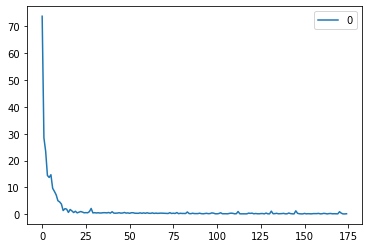

In [51]:
loss.plot()

In [52]:
accuracy=model.history.history['accuracy']

In [53]:
accuracy = pd.DataFrame(accuracy)

<AxesSubplot:>

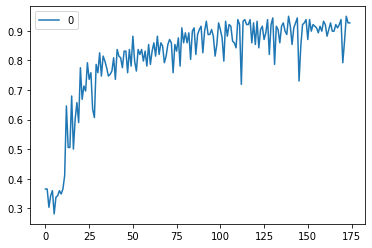

In [54]:
accuracy.plot()

In [55]:
#model.reset_states()

In [58]:
#model.save("model_96_percent_accuracy.h5")

In [64]:
x.iloc[170].values

array([1.22e+01, 3.03e+00, 1.90e+01, 1.25e+00, 4.90e-01, 7.30e-01,
       5.50e+00, 6.60e-01, 1.83e+00, 5.10e+02])

In [65]:
model.predict([[1.22e+01, 3.03e+00, 1.90e+01, 1.25e+00, 4.90e-01, 7.30e-01,
       5.50e+00, 6.60e-01, 1.83e+00, 5.10e+02]])

array([[4.0569990e-05, 1.4012232e-01, 8.5983711e-01]], dtype=float32)